In [1]:
import mne 

In [2]:
from mne import read_epochs

In [3]:
from mne.time_frequency import psd_welch

In [4]:
import matplotlib.pyplot as plt

In [5]:
import os

In [6]:
import glob

In [7]:
import pandas as pf

In [8]:
from fooof import FOOOF

In [9]:
from fooof import FOOOFGroup

In [10]:
from fooof.plts.annotate import plot_annotated_model

In [11]:
from fooof.objs import fit_fooof_3d, combine_fooofs

In [12]:
from fooof.plts.periodic import plot_peak_fits, plot_peak_params

In [13]:
from fooof.plts.aperiodic import plot_aperiodic_params, plot_aperiodic_fits

In [14]:
from fooof.utils.io import load_fooofgroup

In [15]:
from mne.viz import plot_topomap

In [16]:
import numpy as np

In [17]:
import scipy.stats

In [18]:
epochsM=mne.read_epochs(r'C:\Users\ytaza\Desktop\Project Single subject\sub-101-004-motor-epo.fif')

Reading C:\Users\ytaza\Desktop\Project Single subject\sub-101-004-motor-epo.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -1000.00 ...    1500.00 ms
        5 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
56 matching events found
No baseline correction applied
0 projection items activated


In [19]:
info = mne.io.read_info(r'C:\Users\ytaza\Desktop\Project Single subject\sub-101-004-motor-epo.fif')

    Read 5 compensation matrices


In [20]:
epochsM=epochsM.pick_types(meg=True, ref_meg=False,misc=False)

Removing 5 compensators from info because not all compensation channels were picked.


In [21]:
a=epochsM.info['ch_names']

In [22]:
a=np.array(a)
print(a.shape)

(274,)


power spectra across data epochs within subjects, as [n_epochs, n_channels, n_freqs]

In [23]:
print(a.shape)

(274,)


In [24]:
fm = FOOOF()

In [25]:
freq_range=[0,120]

 %plt.savefig('channel'+str(a)+'.png',)
 

In [26]:
for a in range(274):
    psds,freqs= mne.time_frequency.psd_welch(epochsM,fmin=0,fmax=120,picks=[a])
    n=np.mean(psds,axis=0)
    array=np.array(n)
    np.array(freqs)
    fm.fit(freqs,n.reshape(-1),freq_range)
    
    exponent = fm.get_params('aperiodic_params', 'exponent')
    print(exponent)


    
    
    
     

Effective window size : 0.427 (s)

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 2.34 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

0.8972710564300705
Effective window size : 0.427 (s)

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 2.34 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

0.7611223358274157
Effective window size : 0.427 

In [56]:
exM004=[]

In [57]:
for a in range(274):
    psds,freqs= mne.time_frequency.psd_welch(epochsM,fmin=0,fmax=120,picks=[a])
    n=np.mean(psds,axis=0)
    array=np.array(n)
    np.array(freqs)
    fm.fit(freqs,n.reshape(-1),freq_range)
    exp = fm.get_params('aperiodic_params', 'exponent')
    exM004.append(exp)
    
    print('Aperiodic parameters: \n', fm.aperiodic_params_, '\n')
    print(exp)
    

    
    
    
    

Effective window size : 0.427 (s)

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 2.34 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Aperiodic parameters: 
 [-27.21163268   0.89727106] 

0.8972710564300705
Effective window size : 0.427 (s)

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 2.34 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resoluti

from mne import read_epochs
from mne.viz import plot_topomap
from matplotlib.pylab as plt

epochs = read_epochs(epo_path, verbose=False)
epochs = epochs.pick_types(meg=True, ref_meg=False, misc=False)
epo_info = epo_info.info

f, ax = plt.subplots(1, 1, figsize=(10,10), facecolor="white", sharey=False, sharex=False)
plot_topomap(
   np.zeros(274), # matrix of data corresponding to the sensor order in epochs["ch_names"] or epochs.get_data()
   epo_info,
   cmap="RdBu_r",
   vmin=-1, # you need to set it yourself according to the data
   vmax=1, # you need to set it yourself according to the data
   axes=ax,
   show=False
)

In [59]:
epochsV=mne.read_epochs(r'C:\Users\ytaza\Desktop\Project Single subject\sub-101-004-visual-epo.fif')

Reading C:\Users\ytaza\Desktop\Project Single subject\sub-101-004-visual-epo.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -1000.00 ...    2000.00 ms
        5 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
56 matching events found
No baseline correction applied
0 projection items activated


In [60]:
epochsV=epochsV.pick_types(meg=True, ref_meg=False,misc=False)

Removing 5 compensators from info because not all compensation channels were picked.


In [61]:
info = mne.io.read_info(r'C:\Users\ytaza\Desktop\Project Single subject\sub-101-004-visual-epo.fif')

    Read 5 compensation matrices


In [62]:
b=epochsV.info['ch_names']

In [63]:
b=np.array(b)
print(b.shape)

(274,)


In [64]:
exV004=[]

In [65]:
for b in range(274):
    psdsV,freqsV= mne.time_frequency.psd_welch(epochsV,fmin=0,fmax=120,picks=[b])
    nV=np.mean(psdsV,axis=0)
    array=np.array(nV)
    np.array(freqsV)
    fm.fit(freqsV,nV.reshape(-1),freq_range)
    exp = fm.get_params('aperiodic_params', 'exponent')
    exV.append(exp)
    
    print('Aperiodic parameters: \n', fm.aperiodic_params_, '\n')
    print(exp)

Effective window size : 0.427 (s)

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 2.34 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Aperiodic parameters: 
 [-27.30881331   0.85346902] 

0.8534690158463051
Effective window size : 0.427 (s)

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 2.34 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resoluti

In [66]:
exV004=np.array(exV)

In [67]:
exM004=np.array(ex)

In [68]:
tot004=np.concatenate((exV004,exM004))

In [69]:
tot004=np.array(tot004)

In [73]:
exd004=np.subtract(ex,exV)

In [74]:
exd=np.array(exd)

(<matplotlib.image.AxesImage at 0x1e4c36ec6a0>,
 <matplotlib.contour.QuadContourSet at 0x1e4c36ec4c0>)

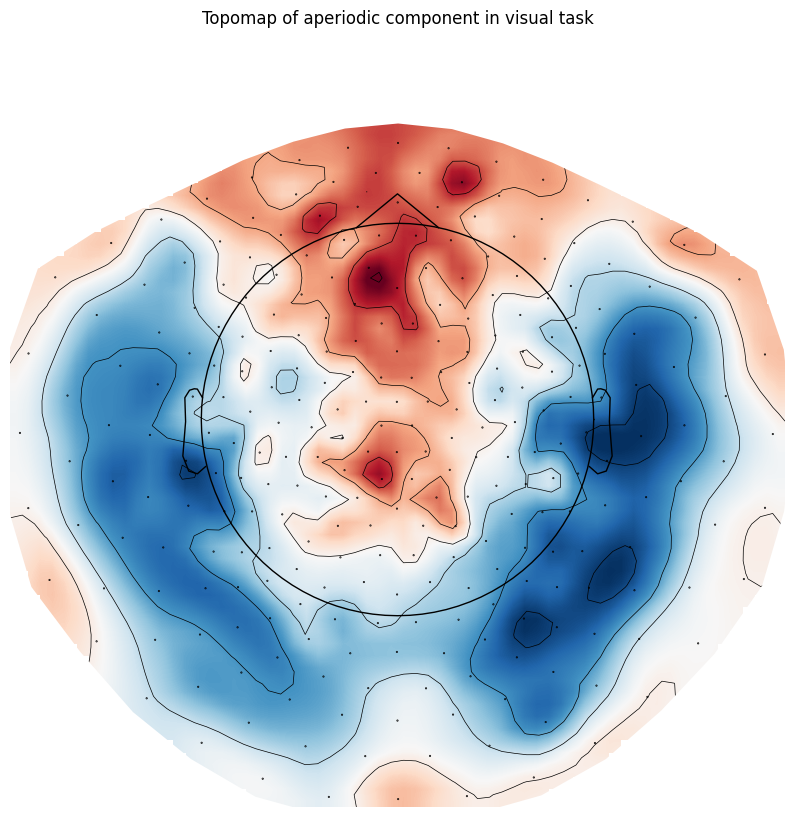

In [76]:
f, ax = plt.subplots(1, 1, figsize=(10,10), facecolor="white", sharey=False, sharex=False)
ax.set(title="Topomap of aperiodic component in visual task")

plot_topomap(exV,epochsV.info,cmap="RdBu",show=False, axes=ax,vmax=np.max(exV),vmin=np.min(exV))


[Text(0.5, 1.0, 'Topomap of aperiodic component in visual task')]

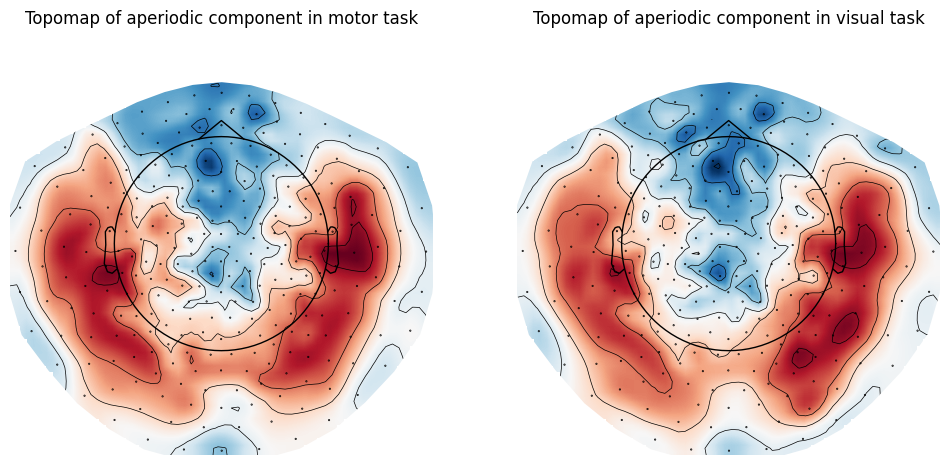

In [138]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=[12,8],facecolor="white", sharey=False, sharex=False)
ax1.set(title="Topomap of aperiodic component in motor task")
plot_topomap(exM004,epochsM.info,cmap="RdBu_r",show=False, axes=ax1,vmax=np.max(tot),vmin=np.min(tot))
plot_topomap(exV ,epochsV.info ,cmap="RdBu_r",show=False, axes=ax2,vmax=np.max(tot),vmin=np.min(tot))
ax2.set(title="Topomap of aperiodic component in visual task")



(<matplotlib.image.AxesImage at 0x1e4c266adf0>,
 <matplotlib.contour.QuadContourSet at 0x1e4c266a1c0>)

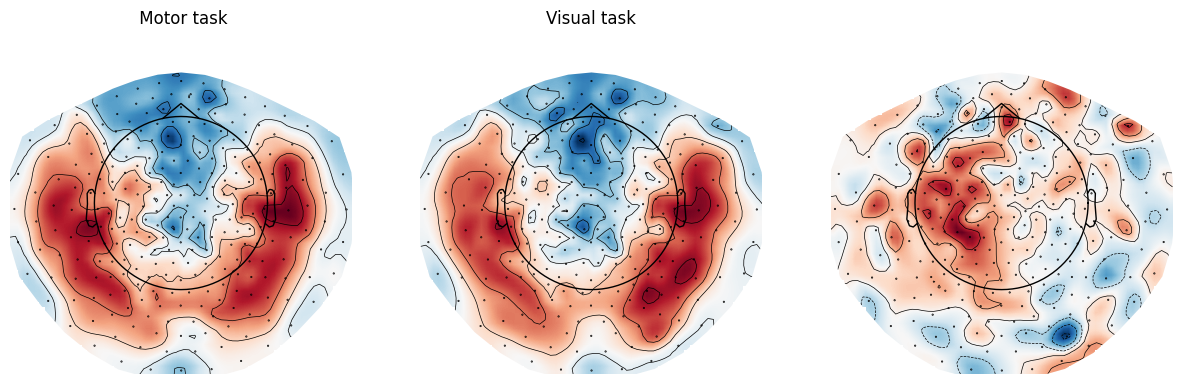

In [80]:
fig,(ax1,ax2,ax3)= plt.subplots(ncols=3, figsize=[15,15],facecolor="white", sharey=False, sharex=False)
ax1.set(title=" Motor task")
plot_topomap(ex,epochsM.info,cmap="RdBu_r",show=False, axes=ax1,vmax=np.max(tot),vmin=np.min(tot))
plot_topomap(exV ,epochsV.info ,cmap="RdBu_r",show=False, axes=ax2,vmax=np.max(tot),vmin=np.min(tot))
ax2.set(title="Visual task")
plot_topomap(exd,epochsM.info,cmap="RdBu_r",show=False, axes=ax3,vmax=np.max(exd),vmin=np.min(exd))
ax3.set(title="Motor-visual")
